<h2>Bar<h2>

In [1]:
import pandas as pd
import sqlite3

In [30]:
db_con = sqlite3.connect('checking-logs.sqlite.sqlite')

<h3>analyze only the users and not the admins<h3>

In [33]:
sql_query = """
SELECT
    timestamp as datetime
FROM 
    checker
WHERE
    uid LIKE 'user_%'
"""

db = pd.io.sql.read_sql(sql=sql_query, con=db_con, parse_dates=['datetime'])

cut_labels = ['night', 'morning', 'afternoon', 'evening']
cut_bins = [-1, 3, 9, 16, 23]
db['daytime'] = pd.cut(pd.DatetimeIndex(db.datetime).hour, bins=cut_bins, labels=cut_labels)

new_checker_df = db.groupby(by=[db['datetime'].dt.date, db['daytime']]).count()
new_checker_df.rename(columns={'datetime': 'commits'}, inplace=True)
new_checker_df = new_checker_df.unstack().droplevel(0, axis=1)
new_checker_df.fillna(value=0, inplace=True)
new_checker_df

daytime,night,morning,afternoon,evening
datetime,,,,
2020-04-17,0.0,13.0,10.0,0.0
2020-04-18,0.0,1.0,33.0,35.0
2020-04-19,2.0,4.0,16.0,11.0
2020-04-20,0.0,0.0,12.0,13.0
2020-04-21,0.0,0.0,0.0,25.0
2020-04-22,0.0,0.0,4.0,24.0
2020-04-23,2.0,6.0,15.0,20.0
2020-04-24,0.0,0.0,4.0,12.0
2020-04-25,1.0,21.0,33.0,49.0


<h3>create a graph<h3>

<AxesSubplot:title={'center':'Commits per day'}, xlabel='datetime'>

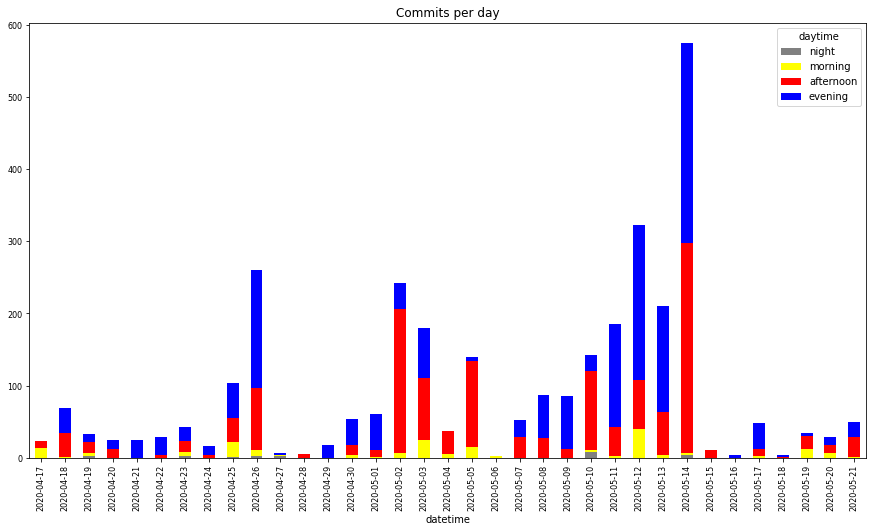

In [40]:
col = {'night':'grey', 'morning':'yellow', 'afternoon': 'red', 'evening':'blue'}
new_checker_df.plot.bar(fontsize=8,figsize=(15,8),title='Commits per day',rot=90, stacked=True, color=col)

<h3>close the connection to the database<h3>

In [41]:
db_con.close()

<h3>When do our users usually commit the labs: in the night, morning, afternoon,
or evening?<h3>

<h3>The answer is afternoon and evening.<h3>

<h3>Which day has the most number of commits and at the same time, the number of commits in the evening is higher than in the afternoon?<h3>

<h3>The answer is 2020-05-14.<h3>